In [1]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

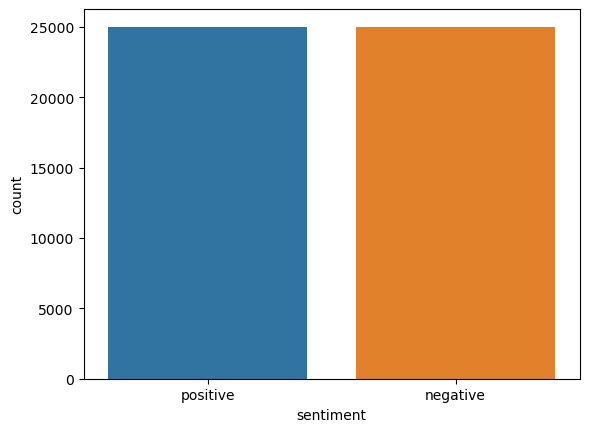

In [4]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [5]:
positive_review=list(df[df['sentiment']=='positive']['review'])[:100]
negative_review=list(df[df['sentiment']=='negative']['review'])[:100]

In [6]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 
stopwords=set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [7]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

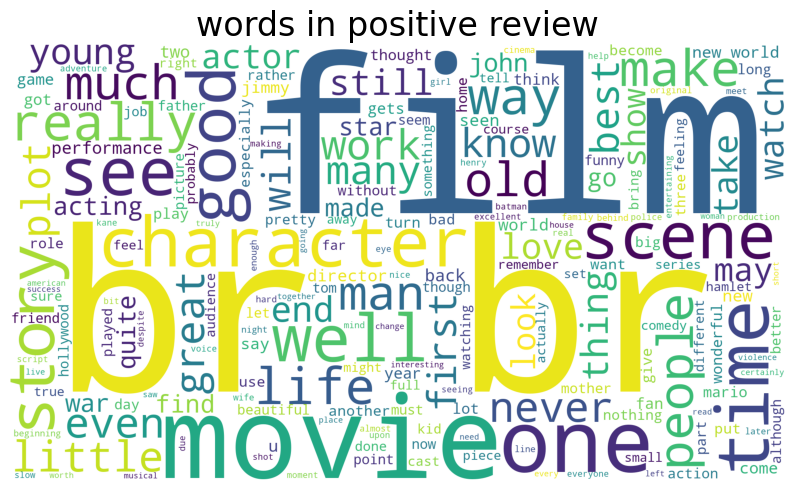

In [8]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

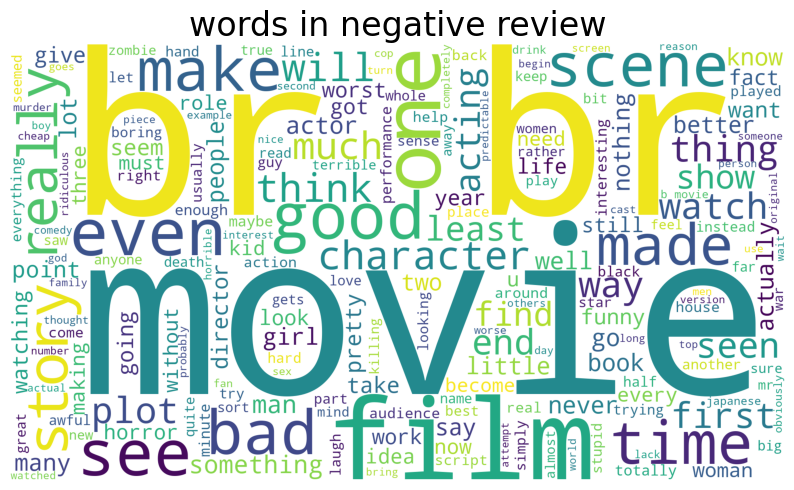

In [9]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [10]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above sentence
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in preprocessed_reviews:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [11]:
x=text_processing(df[:1000])

 77%|███████████████████████████████████████████████████████████▌                 | 773/1000 [00:00<00:00, 1827.27it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_7716\2228875265.py:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1829.69it/s]


In [12]:
df = df[:1000]

In [13]:
df['cleaned_review']=x

In [14]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [15]:
X = df['cleaned_review']
Y = df['sentiment']

In [16]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

In [17]:
df

,review,sentiment,cleaned_review,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...,1
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1
...,...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,noth sacred. just ask erni fosselius. these da...,1
996,I hated it. I hate self-aware pretentious inan...,negative,i hate it. i hate self-awar pretenti inan masq...,0
997,I usually try to be professional and construct...,negative,i usual tri profession construct i critic movi...,0
998,If you like me is going to see this in a film ...,negative,"if go see film histori class someth school, tr...",0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X[:1000], Y[:1000], test_size=0.3, random_state=0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700,), (300,), (700,), (300,))

In [20]:
s = 'hello world world'
s = s.split()
s.count('world')

2

In [21]:
X_train

105    marion davi star remark comedi show peopl rele...
68     i sure produc need trade name somewhat success...
479    joseph bradi clarenc doolittl two sailors, fou...
399    thi movi fairli entertain comedi murphi law ap...
434    yes, indeed, good movie. a love biangle, (sorr...
                             ...                        
835    the stori told before. a deadli diseas spread ...
192    nifti littl episod play mainli laughs, clever ...
629    let keep simple: my two kid glu movie. it flaw...
559    so i rent netflix somebodi gave roger ebert bo...
684    the perfect murder foil wife(play mari ellen t...
Name: cleaned_review, Length: 700, dtype: object

In [22]:
list(y_test).count(0)

162

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [24]:
X_train_bow.shape,X_test_bow.shape
X_train_bow.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
import time

start = time.time()

time.sleep(10)

end = time.time()-start
print(end)

10.0008864402771


In [26]:
X_train.shape

(700,)

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
accuracy_train_list = []
accuracy_test_list = []
f1_train_list =[]
f1_test_list=[]
for i in range(3,30):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train_bow, y_train)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_train_list.append(accuracy_train)
    f1_train = f1_score(y_pred_train,y_train)
    f1_train_list.append(f1_train)
   
    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    accuracy_test_list.append(accuracy_test)
    f1_test = f1_score(y_pred_test,y_test)
    f1_test_list.append(f1_test)
   
    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()
    
    
  
overfit (risky unstable)
train - 90
test - 70

test - 55

ideal both the value are close ( stable)
train- 75
test - 68

test - 65



SyntaxError: invalid syntax. Perhaps you forgot a comma? (946425369.py, line 37)

In [34]:
import matplotlib.pyplot as plt
plt.plot(list(range(3,30)),f1_test_list)
plt.plot(list(range(3,30)),f1_train_list)
plt.legend(['test','train'])
plt.show()

NameError: name 'f1_test_list' is not defined

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=24)

# Training
neigh.fit(X_train_bow, y_train)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_test,f1_test)

0.6171428571428571 0.5433333333333333
0.6422976501305483 0.6422976501305483


In [39]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.25      0.73      0.37        55
    Negative       0.89      0.50      0.64       245

    accuracy                           0.54       300
   macro avg       0.57      0.61      0.51       300
weighted avg       0.77      0.54      0.59       300

              precision    recall  f1-score   support

     Postive       0.29      0.77      0.42       127
    Negative       0.92      0.58      0.71       573

    accuracy                           0.62       700
   macro avg       0.61      0.68      0.57       700
weighted avg       0.81      0.62      0.66       700



In [40]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[ 98,  29],
       [239, 334]], dtype=int64)

<Axes: >

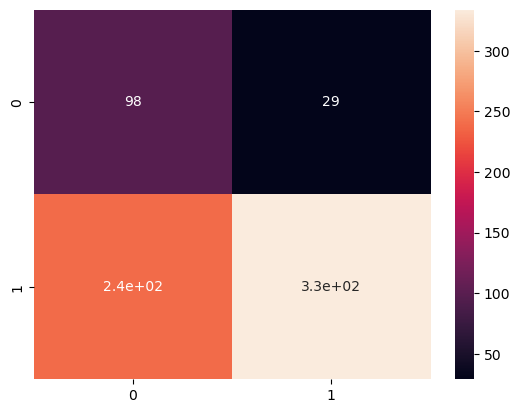

In [41]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(10,30,2))}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train_bow, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                         28]})

In [43]:
clf.best_params_

{'n_neighbors': 28}

In [44]:
neigh = KNeighborsClassifier(n_neighbors=10, p=2)
neigh.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
f1_train = f1_score(y_pred_train,y_train)
print(f1_train)
print(classification_report(y_pred_train, y_train, target_names=target_names))

0.7083775185577942
              precision    recall  f1-score   support

     Postive       0.27      0.76      0.40       120
    Negative       0.92      0.58      0.71       580

    accuracy                           0.61       700
   macro avg       0.60      0.67      0.55       700
weighted avg       0.81      0.61      0.66       700



In [45]:
y_pred_test = clf.predict(X_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=target_names))

0.6272493573264781
              precision    recall  f1-score   support

     Postive       0.20      0.67      0.31        49
    Negative       0.88      0.49      0.63       251

    accuracy                           0.52       300
   macro avg       0.54      0.58      0.47       300
weighted avg       0.77      0.52      0.58       300

